In [2]:
from sklearn import linear_model
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.read_stata("duke.dta")
df.head()

,year,disp,asym,asymsq,contig,ally,sq,dema,demb,distance,...,py,peacyr1,peacyr2,peacyr3,peacyr4,peacyr5,r,dataset,statea,stateb
0,1963,0,0.207951,0.043244,1,0,0.312667,-8,-7,0,...,0,0,0,0,0,0,0.982610,3,365,710
1,1964,1,0.103265,0.010664,1,0,-0.234402,-7,10,3329,...,0,0,0,0,0,0,0.956511,3,2,365
2,1959,0,0.468240,0.219249,1,0,-0.064242,-8,10,5062,...,0,0,0,0,0,0,0.977372,3,200,710
3,1966,0,0.558271,0.311667,1,1,-0.043290,9,-5,0,...,0,0,0,0,0,0,0.997575,3,640,645
4,1971,1,0.418835,0.175423,1,0,0.917141,-9,9,0,...,0,0,0,0,0,0,0.971197,3,666,663


In [3]:
print(df.columns)
print(df.shape)

Index(['year', 'disp', 'asym', 'asymsq', 'contig', 'ally', 'sq', 'dema',
       'demb', 'distance', 'lndist', 'majdyd', 'jntdem', 'jntdemsq', 'py',
       'peacyr1', 'peacyr2', 'peacyr3', 'peacyr4', 'peacyr5', 'r', 'dataset',
       'statea', 'stateb'],
      dtype='object')
(23529, 24)


In [236]:
# 1947-85 are training, 1986-89 are testing
train, test = df[df['year'] < 1986], df[df['year'] > 1985]
predictors = ['asym', 'asymsq', 'contig', 'distance', 'ally', 'sq', 'peacyr1', 'peacyr2',
              'peacyr3', 'peacyr4', 'dema','demb']
train_x, train_y = train[predictors], train['disp']
test_x, test_y = test[predictors], test['disp']

In [237]:
# Random subseting
from sklearn.model_selection import train_test_split
df_y = df['disp']
df_x = df[predictors]
train_x_rd, test_x_rd, train_y_rd, test_y_rd = train_test_split(df_x, df_y, test_size=0.20, random_state=112)

In [238]:
from sklearn import preprocessing
train_x = preprocessing.normalize(train_x)
test_x = preprocessing.normalize(test_x)
train_x_rd = preprocessing.normalize(train_x_rd)
test_x_rd = preprocessing.normalize(test_x_rd)

In [239]:
train_x_rd.shape, test_x_rd.shape, train_x.shape

((18823, 12), (4706, 12), (21047, 12))

In [240]:
from sklearn import metrics
# For post1947-85
clf = linear_model.LogisticRegression(random_state=10)
clf.fit(train_x, train_y)
test_score = clf.decision_function(test_x)
fpr, tpr, thresholds = metrics.roc_curve(test_y, test_score)
auc = metrics.auc(fpr, tpr)
print('Post 1947-85 AUC', auc)
# For random subset
clf2 = linear_model.LogisticRegression(random_state=10)
clf2.fit(train_x_rd, train_y_rd)
test_score2 = clf.decision_function(test_x_rd)
fpr2, tpr2, _ = metrics.roc_curve(test_y_rd, test_score2)
auc2 = metrics.auc(fpr2, tpr2)
print('Random subset AUC', auc2)

Post 1947-85 AUC 0.826199412209
Random subset AUC 0.745565738266


In [241]:
from sklearn.neural_network import MLPClassifier
# alpha is for regularization
# For post1947-85
clf_neural = MLPClassifier(hidden_layer_sizes=(20,), alpha=1e-3, random_state=10)
clf_neural.fit(train_x, train_y)
neural_prob = clf_neural.predict_proba(test_x)[:,1]
fpr_neu, tpr_neu, _ = metrics.roc_curve(test_y, neural_prob)
auc_neu = metrics.auc(fpr_neu, tpr_neu)
print('Post 1947-85 AUC', auc_neu)
# For random subset
clf_neural2 = MLPClassifier(hidden_layer_sizes=(20,), alpha=1e-3, random_state=10)
clf_neural2.fit(train_x_rd, train_y_rd)
neural_prob2 = clf_neural.predict_proba(test_x_rd)[:,1]
fpr_neu2, tpr_neu2, _ = metrics.roc_curve(test_y_rd, neural_prob2)
auc_neu2 = metrics.auc(fpr_neu2, tpr_neu2)
print('Random subset AUC', auc_neu2)

Post 1947-85 AUC 0.840953771
Random subset AUC 0.75915278251


In [242]:
from sklearn.ensemble import RandomForestClassifier
# For post1947-85
rf = RandomForestClassifier()
rf.fit(train_x, train_y)
rf_prob = rf.predict_proba(test_x)[:,1]
fpr_rf, tpr_rf, _ = metrics.roc_curve(test_y, rf_prob)
auc_rf = metrics.auc(fpr_rf, tpr_rf)
print('Post 1947-85 AUC', auc_rf)
# For random subset
rf2 = RandomForestClassifier()
rf2.fit(train_x_rd, train_y_rd)
rf_prob2 = rf.predict_proba(test_x_rd)[:,1]
fpr_rf2, tpr_rf2, _ = metrics.roc_curve(test_y_rd, rf_prob2)
auc_rf2 = metrics.auc(fpr_rf2, tpr_rf2)
print('Random subset AUC', auc_rf2)

Post 1947-85 AUC 0.783194825053
Random subset AUC 0.989250165893


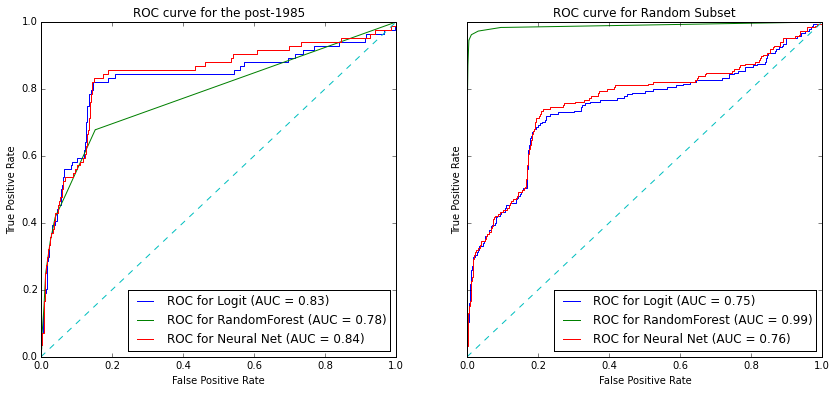

In [243]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
f.set_size_inches(14, 6)
# For post1947-85
ax1.plot(fpr, tpr, label='ROC for Logit (AUC = %0.2f)' % auc)
ax1.plot(fpr_rf, tpr_rf, label='ROC for RandomForest (AUC = %0.2f)' % auc_rf)
ax1.plot(fpr_neu, tpr_neu, label='ROC for Neural Net (AUC = %0.2f)' % auc_neu)
ax1.plot([0, 1], [0, 1], linestyle='--')
ax1.legend(loc="lower right")
ax1.set_xlabel('False Positive Rate')
ax1.set_ylabel('True Positive Rate')
ax1.set_title('ROC curve for the post-1985')
# For random subset
ax2.plot(fpr2, tpr2, label='ROC for Logit (AUC = %0.2f)' % auc2)
ax2.plot(fpr_rf2, tpr_rf2, label='ROC for RandomForest (AUC = %0.2f)' % auc_rf2)
ax2.plot(fpr_neu2, tpr_neu2, label='ROC for Neural Net (AUC = %0.2f)' % auc_neu2)
ax2.plot([0, 1], [0, 1], linestyle='--')
ax2.legend(loc="lower right")
ax2.set_xlabel('False Positive Rate')
ax2.set_ylabel('True Positive Rate')
ax2.set_title('ROC curve for Random Subset')

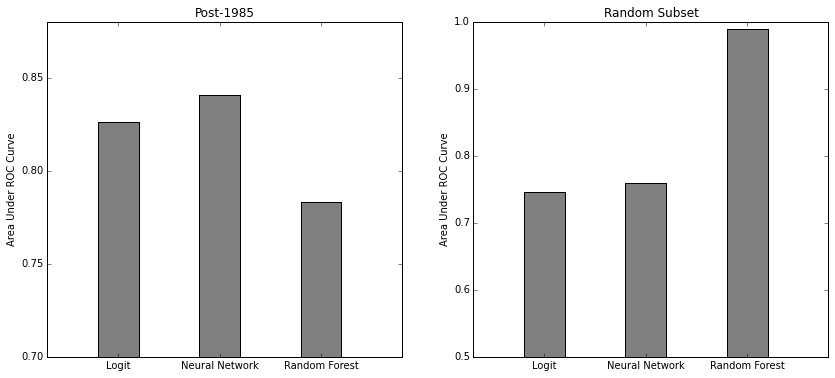

In [244]:
f2, (ax12, ax22) = plt.subplots(1, 2)
f2.set_size_inches(14, 6)
# For post1947-85
n_groups = 3
width = 0.40
aucs = (auc, auc_neu, auc_rf)
index = (1, 2, 3)
ax12.bar(index, aucs, width, color='gray')
ax12.set_xlim((0.5, 4))
ax12.set_ylim((0.7, 0.88))
ax12.set_xticks([i+width/2 for i in index])
ax12.set_xticklabels(['Logit', 'Neural Network', 'Random Forest'])
ax12.set_ylabel('Area Under ROC Curve')
ax12.set_title('Post-1985')
# For random subset
aucs = (auc2, auc_neu2, auc_rf2)
index = (1, 2, 3)
ax22.bar(index, aucs, width, color='gray')
ax22.set_xlim((0.5, 4))
ax22.set_ylim((0.5, 1))
ax22.set_xticks([i+width/2 for i in index])
ax22.set_xticklabels(['Logit', 'Neural Network', 'Random Forest'])
ax22.set_ylabel('Area Under ROC Curve')
ax22.set_title('Random Subset')